# Pre-class Reading: Day 15 (Oct 30, 2023)<br>Monte Carlo Methods 1
Learning goals
1. Define pseudorandom number
1. Generate pseudorandom numbers using various functions from `np.random`
1. Use a seed when generating random numbers and be able to describe situations in which using a seed would be useful
1. Use Monte Carlo integration to approximate definite integrals or areas
1. Appreciate the breadth of systems and problems that can be solved using Monte Carlo methods

## *Self-assessment questions*

**If you can already answer these correctly, you can skip the rest of the reading assignment and submit it. Otherwise, complete the rest of the reading assignment and return to these questions to test what you learned. You might decide you would benefit from further review before class.**

Note that these questions can often be answered easily by running the provided code, so the intellectual work on your part is figuring out the correct answer and then running the code to check your answer.

Please ensure all of these self-assessment questions are answered correctly before submitting this pre-class reading assignment. The *Your Turn* questions, found throughout the rest of this assignment, are for your practice as you learn this material and do not need to be answered correctly to receive full completion marks for this pre-class reading assignment.

### Self-assessment question 15.1

Which of the following methods will result in the array `y` having the value 37 appear approximately ten times?

**Method 1:**
```python
arr1 = np.array([1, 2, 37, 37])
y = np.random.choice(arr1, size=20)
```

**Method 2:**
```python
arr2 = np.array([1, 2, 37])
prob = [0.25, 0.25, 0.50]
y = np.random.choice(arr2, size=20, p=prob)
```

A) Method 1 only<br>
B) Method 2 only<br>
C) Both methods<br>
D) Neither method

In [ ]:
# Code testing area to help answer this question


In [ ]:
# Enter your answer inside the string quotes and run this cell to check your anwer

answer = ""

import hashlib
assert answer in ['A', 'B', 'C', 'D'], "Your answer did not match any of the choices"
assert hashlib.sha256(answer.encode()).hexdigest() == \
    '6b23c0d5f35d1b11f9b683f0b0a617355deb11277d91ae091d399c655b87940d', "Your answer is incorrect"
print("Your answer", answer, "is correct") # Passed all assert statements above

### Self-assessment question 15.2

Why is it important to set a seed value in random number generation when testing or debugging algorithms?
   
A) To ensure reproducibility of results <br>
B) To generate truly random sequences <br>
C) To speed up the random number generation process <br>
D) To meet regulatory requirements <br>
   


In [ ]:
# Code testing area to help answer this question




In [ ]:
# Enter your answer inside the string quotes and run this cell to check your anwer

answer = ""

import hashlib
assert answer in ['A', 'B', 'C', 'D'], "Your answer did not match any of the choices"
assert hashlib.sha256(answer.encode()).hexdigest() == \
    '559aead08264d5795d3909718cdd05abd49572e84fe55590eef31a88a08fdffd', "Your answer is incorrect"
print("Your answer", answer, "is correct") # Passed all assert statements above

### Self-assessment question 15.3

Review the radioactive decay simulation in Section 15.5 below (the last section in this notebook). In the simulation, how is it determined if a *particular atom* decays during a given time step?

A) If a random number generated for that atom is less than the decay probability 
`p`<br>
B) If any of the random number generated during that time step are less than the decay probability `p`<br>
C) The total number of random numbers generated that are less than the decay probability<br>
D) If a random number generated for that atom exceeds the half-life<br>
E) If the random number generated is less than N, the current number of atoms

In [ ]:
# Code testing area to help answer this question




In [ ]:
# Enter your answer inside the string quotes and run this cell to check your anwer

answer = ""

import hashlib
assert answer in ['A', 'B', 'C', 'D', 'E'], "Your answer did not match any of the choices"
assert hashlib.sha256(answer.encode()).hexdigest() == \
    '559aead08264d5795d3909718cdd05abd49572e84fe55590eef31a88a08fdffd', "Your answer is incorrect"
print("Your answer", answer, "is correct") # Passed all assert statements above

## *15.1 Introduction*

We are going to learn how to model various types of processes using random numbers:

* **Random processes** - One example is radioactive decay, where it is not possible to know exactly when any particular atom will decay, and
* **Processes that are most easily modeled or approximated using randomness** - Brownian motion is much more practical to model as a random process, but if we knew the positions and velocities of all of the surrounding molecules, we could model it deterministically. 

Let's look at how randomness works in computing as we start learning how to use random inputs to model systems and solve problems computationally, which is most commonly known as a Monte Carlo (MC) simulation or method. At their core they involve:

1. Drawing a set of random inputs from a probability distribution.
2. Performing deterministic calculations on these inputs and/or drawing further sets of random inputs to model intermediate behaviours and interactions.
3. Aggregating these results to get an approximation.

## *15.2 Pseudorandom numbers*

Let's generate our first random numbers. When numpy, and similar libraries perform "random" operations, they usually return "pseudorandom" results. Pseudorandom numbers are numbers that are generated in a deterministic manner, using an algorithm, but which appear to be random. As we will see in a moment, when we provide an algorithm that generates pseudorandom numbers the same initial state (typically known as a "seed"), the sequence of pseudorandom numbers will always be the same. This is in contrast to true random numbers, which are not deterministic and cannot be predicted. Importantly, for our purposes the statistical behvaiour of these pseudorandom numbers is indistiguishable from true random numbers.

If you would like to learn more about how numpy performs these operations, you can read the detailed account of it here: https://numpy.org/doc/stable/reference/random/index.html

Let's create an array of 5 random numbers. Run this cell multiple times to see that the numbers continue to be different each time they are generated.

In [ ]:
# np.random.rand returns random floats in the half-open interval [0.0, 1.0).

import numpy as np
np.random.rand(5)

Let's briefly look at using a seed to generate these numbers, while recognizing that if we do not specify the seed, a default seed is provided to the function using a nondeterministic piece of information from the computing system.

When we specify a seed of `8000` below, we are telling the random number generating algorithm the initial state from which it should generate all of its pseudorandom numbers. 

In [ ]:
# Run this cell multiple times and notice the output never changes

np.random.seed(8000) # seed = 8000
np.random.rand(5)

## *15.3 Using Monte Carlo methods to approximate the value of π*

We will look at a common starting example of using the technique of Monte Carlo methods to approximate the value of π. 

To so this we will

1. Randomly generate points uniformly inside a unit square ($R=1$).
2. Determine how many of these points fall inside a quarter circle inscribed in the square.
3. The ratio of the points inside the quarter circle ($N_{in}$) to the total number of points ($N_{tot}$), multiplied by 4, provides an approximation of π, as shown by

$$4\frac{N_{in}}{N_{tot}} = 4\frac{A_{\mbox{quarter circle}}}{A_{\mbox{unit square}}}=4\frac{\pi R^2/4}{R^2}=\pi$$

Let's quickly visualize how this will work. In the figure below, $N_{in}$ is our total number of red points and $N_{tot}$ is our total number of points.

NameError: name 'ax' is not defined

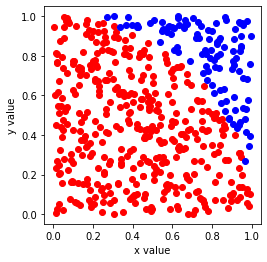

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(500)
y = np.random.rand(500)

plt.axes().set_aspect(1)

mask = x**2 + y**2 <= 1
plt.plot(x[mask], y[mask], 'ro')

mask = x**2 + y**2  >=1
plt.plot(x[mask], y[mask], 'bo')

plt.xlabel("x value")
plt.ylabel("y value")
plt.show()

Before we modify the above code to do our actual calculation, let's look at some criteria for our random numbers for this example, as summarized by Ayars (https://freecomputerbooks.com/Computational-Physics-with-Python-by-Eric-Ayars.html):

1. They must be uniformly distributed. For exmaple, if the points were distributed about a normal curve then we'd see more points in the central area of the figure and get a much less accurate number.
1. They must be uncorrelated. For example, if our random number were correlated in such a way that a low one was most often followed by a high one, and vice-versa, then the points in the figure would trend towards the upper left and lower right of the figure, skewing our results.
1. We need a lot of points for an accurate approximation. Our percent/fractional error from this method scales approximately as $1/\sqrt{N}$, so we need approximately one million pairs of random numbers to reduce our error down to 0.1% (i.e., $3.1416 \pm 0.0031$).


Let's do the calculation. 

In [2]:
# Run me to approximate the value of pi to a relative uncertainty of 1/sqrt(10000) = 1%

def monte_carlo_pi(N):
    import numpy as np
    x = np.random.rand(N)
    y = np.random.rand(N)
    d = x**2 + y**2
    count = np.sum(d <= 1)
    return 4*count/N

print( f" MC: {monte_carlo_pi(10000):.4f}, Actual: {np.pi:.4f}")

 MC: 3.1484, Actual: 3.1416


On Solo Worksheet 15 we will spend some time 
1. Looking at the speed gained from doing this as an array operation instead of using a loop, and
1. Investigate the Monte Carlo accuracy claim of $~1/\sqrt{N}$ more thoroughly.

### Your turn 15.1 - Definite integral of sin

Adapt the technique to approximate the value of pi to calculate

$$\int^\pi_0 \sin(x) \, dx.$$

Remember that the concept of an integral being the area under the curve is what you want to pay attention to here.

In [ ]:
# Update this code to calculate the definite integral of sin x from 0 to pi

def mc_sin(N):
    
    import numpy as np
    
    # your code here
    
    return N # update to return the correct value

actual = -(np.cos(np.pi)-np.cos(0))
print( f" MC: {mc_sin(10000):.4f}, Actual: {actual:.4f}")

## *15.4 Other random numbers*

So far we have only looked at generating floats unformly along the half-open interval `[0.0, 1.0)`. But, let's look at some other types of random numbers that we can generate.

### np.random.randint: Returns random integers from low (inclusive) to high (exclusive).

In [ ]:
np.random.randint(1, 10, size=5)  # Generates an array of 5 random integers between 1 and 10.

### np.random.choice: Generates a random sample from a given 1-D array.

In [ ]:
np.random.choice([7, 8, 9], size = 5)  # Picks 5 random elements from the list.

### np.random.shuffle: Modifies a sequence in-place by shuffling its contents.

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
np.random.shuffle(arr)  # Shuffles the array's contents.
arr

### np.random.uniform: Draws samples from a uniform distribution in the semi-open interval `[low, high)`

In [ ]:
np.random.uniform(0, 5, 3)  # Generates 3 samples from a uniform distribution between 0 and 5.

### np.random.randn: Returns a sample (or samples) from the "standard normal" distribution.
A standard normal distrubution has a mean of 0 and standard deviation of 1.

In [ ]:
import matplotlib.pyplot as plt

data = np.random.randn(10000)
plt.hist(data)
plt.show()

### np.random.normal: Draws random samples from a normal (Gaussian) distribution with a mean of `loc` and standard deviation of `scale`

In [ ]:
import matplotlib.pyplot as plt

data = np.random.normal(loc=10, scale=3, size=1000)
plt.hist(data)
plt.show()

### Additional specific distributions:

**beta**, **binomial**, **chisquare**, **exponential**, **gamma**, **geometric**, **poisson**, etc.: These functions generate random numbers from specific statistical distributions. For example, `np.random.binomial(n, p, size)` draws samples from a binomial distribution.

## *15.5 A simple Monte Carlo simulation of radioactive decay*

Below is a relatively simple Monte Carlo simulation for the decay of 1000 atoms of $^{208}$Tl, which has a half-life of 3.053 minutes. The key idea is that our number of radioactive atoms $N$ decays over time. At each time step, we need to use the decay probability `p`, that a given radioactive atom will decay during the time step $\Delta t$ based on the half-life $T_{1/2}$:

$$ p = 1 - e^{-\Delta t \; ln(2) / T_{1/2} } .$$

For each time step we use $N$ random numbers to determine how many of the $N$ remaining radioactive numbers decayed during that time step.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_decay(N, half_life, delta_t, time_steps):
    """Simulate radioactive decay using Monte Carlo method.
    
    Parameters:
    - N: Initial number of radioactive atoms
    - half_life: Half-life in seconds
    - delta_t: Time step for the simulation in seconds
    - time_steps: Total number of time steps to simulate
    
    Returns:
    - A list of the number of radioactive atoms remaining at each time step.
    """
    
    # Probability out of 1 that a given atom will decay during a 
    # time interval delta_t
    p = 1 - np.exp(-delta_t * np.log(2) / half_life)
    
    # Start our list for numbers of atoms remaining after each time step
    atoms_remaining = [N]
    
    # Loop through our total number of time_steps
    for t in range(time_steps):
        
        # Determine how many of the N atoms remaining have decayed 
        # during this time step
        decayed = np.sum(np.random.rand(N) < p)
        
        # Update our total number of radioactive atoms 
        N -= decayed
        
        # Update the list of atoms remaining after each time step
        atoms_remaining.append(N)
    
    # Return the list of atoms remaining after each time step
    return atoms_remaining

# Parameters
N = 1000               # Initial number of atoms
half_life = 3.053 * 60 # Half-life in seconds (3.053 minutes converted to seconds)
delta_t = 1            # Time step: 1 second
time_steps = 500       # Number of time steps

# Run simulation
atoms = radioactive_decay(N, half_life, delta_t, time_steps)

# Plot results
times = np.linspace(0, time_steps,time_steps+1) # 500 steps after t = 0
predicted = N*np.exp(-times*np.log(2) / half_life)

plt.plot(times, atoms, label="Monte-Carlo")
plt.plot(times, predicted, label="Predicted")
plt.xlabel('Time (seconds)')
plt.ylabel('Remaining Atoms')
plt.title(f'Radioactive Decay Simulation for {280}Tl\n(Half-life = {half_life/60} mins)')
plt.legend()
plt.grid(True)
plt.show()


Take some time to understand the simulation above. One of the self-assessment questions above will follow-up on this simulation.

## *Submitting this reading assignment*
Before submitting your work, restart + rerun your notebook to make sure that your self-assessmet questions run correctly and without error. We will only check that the Self-assessment questions at the start of the assignment have run correctly. After you've executed and checked your notebook, choose: File >> Save_and_Export_Notebook_As >> HTML. This will download an HTML version of your notebook to your computer which you can upload to Canvas